In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Morphological transformations are some simple operations based on the image shape. They are normally performed on binary images. Whenn we perform morphological transformations two things are required:
<ul>
    <li>Original Image</li>
    <li>Kernel - which tells us how to change the value of any 
        given pixel by combining it with different amounts of the
        neighboring pixels.</li>
</ul>

In [2]:
for attribute in dir(cv2):
    if 'IMREAD' in attribute:
        print(attribute)

IMREAD_ANYCOLOR
IMREAD_ANYDEPTH
IMREAD_COLOR
IMREAD_GRAYSCALE
IMREAD_IGNORE_ORIENTATION
IMREAD_LOAD_GDAL
IMREAD_REDUCED_COLOR_2
IMREAD_REDUCED_COLOR_4
IMREAD_REDUCED_COLOR_8
IMREAD_REDUCED_GRAYSCALE_2
IMREAD_REDUCED_GRAYSCALE_4
IMREAD_REDUCED_GRAYSCALE_8
IMREAD_UNCHANGED


In [3]:
img = cv2.imread('data/smarties.png', cv2.IMREAD_GRAYSCALE)

In [4]:
img = cv2.imread('data/j2.jpg')

In [5]:
_, mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

### Dilation - 

In [6]:
kernel = np.ones((5,5),np.uint8)

In [7]:
dilation = cv2.dilate(mask,kernel,iterations = 2)

### Erosion - 

In [8]:
erosion = cv2.erode(mask,kernel, iterations = 1)

### Opening -  here the morphological transformation erosion and dilation both are performed. First erosion happens which is then followd by dilation

In [9]:
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)

### Closing - here the morphological transformation erosion and dilation both are performed. First dilation happens which is then followd by erosion

In [10]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

In [11]:
#MORPH_GRADIENT is the difference between the dilation and erosion
#of an image.
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

In [12]:
titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing',
         'morph gradient', 'TopHat']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

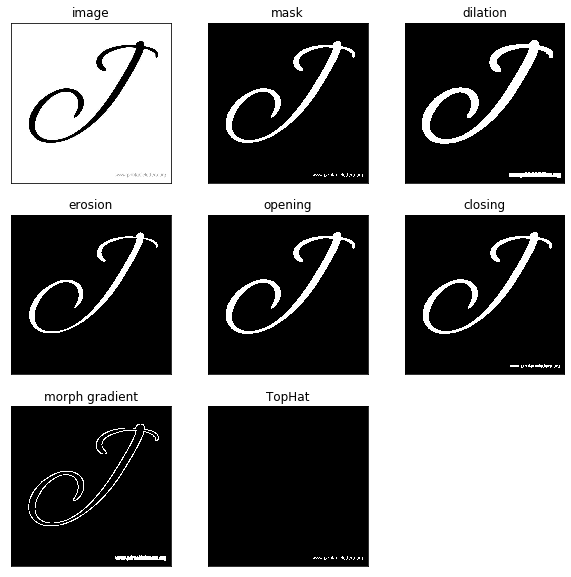

In [13]:
plt.figure(figsize=(10,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()